# Text Classification Demo

## Getting Repo from GitHub in Google Colab

In [ ]:
# If in Google Colab, change to content directory
%cd /content/
# If project exists on local, pull the latest changes, otherwise clone it
!if cd NLPDemo; then git pull; else git clone https://github.com/azucker99/NLPDemo.git NLPDemo; fi

In [6]:
# Changing to the project directory
%cd NLPDemo

[Errno 2] No such file or directory: 'NLPDemo'
/home/azucker/projects/NLPDemo


## Imports and Downloads

In [7]:
# Installing all the required libraries 
%pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 KB 9.8 MB/s eta 0:00:00
  Created wheel for spacy: filename=spacy-3.0.6-cp310-cp310-linux_x86_64.whl size=32114650 sha256=5f27d54b22927f9a4e16d62cb22efc684fe87e2da4d6f72cedeca641ea55ac57
  Stored in directory: /home/azucker/.cache/pip/wheels/c3/db/f8/725ffb71b6583ede763307855ebffb14d8c8340d355b3a57ab
Successfully built spacy
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.8.2
    Uninstalling pydantic-1.8.2:
      Successfully uninstalled pydantic-1.8.2
  Attempting uninstall: click
    Found existing installation: click 8.1.3
    Uninstalling click-8.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from spacy.tokens import DocBin
import random

## Loading in the data

Data comes from kaggle: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

In [2]:
# Reading in the data into a pandas dataframe object
df = pd.read_csv("fake_job_postings.csv")

## Exploratory Data Analysis

In [3]:
print(f"Number of rows {df.shape[0]} \nNumber of columns: {df.shape[1]}")
df.head()

Number of rows 17880 
Number of columns: 18


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# Checking for missing values
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [5]:
# Visualizing the first company profile 
df.loc[0].company_profile

"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City."

not_fraudulent    17014
fraudulent          866
Name: fraudulent, dtype: int64


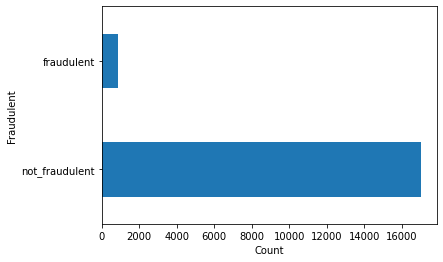

In [6]:
# Visualizing how many job postings are actually fraudulent 
fraudulent_series = df.fraudulent.apply(lambda x: 'fraudulent' if x else 'not_fraudulent')
fraudulent_series.value_counts(sort=True).plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Fraudulent');
print(fraudulent_series.value_counts())

## Preparing Data for Training

In [7]:
# Our training data will come from the description column
df2 = df[['description','fraudulent']].dropna() # Condenses the dataframe to the two columns and drops null values
print(df2.shape)
df2.head()

(17879, 2)


,description,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",0
1,Organised - Focused - Vibrant - Awesome!Do you...,0
2,"Our client, located in Houston, is actively se...",0
3,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0


In [8]:
# Converting the data from a dataframe to the appropriate training format

# Adds a tuples column for each description and its label
df2['tuples'] = df2.apply(lambda row: (row['description'], row['fraudulent']), axis = 1)
# Converts that column to a list
data = df2['tuples'].to_list()
# Printing out the first two entries of our formatted dataset 
data[:2]

[('Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff',
  0),
 ("Organised - Focused - Vibrant - Awesome!Do you have a passion for customer servi

In [9]:
# Splitting data into training and testing data 
train_size = 0.8 # Data will consist of 80% of the training set 
split = int(len(data)*train_size) # The number of documents that will be in the training set

# Setting seed for reproducibility
random.seed(42)
random.shuffle(data) # Shuffling the data so the model does not learn from the order

# Setting train and test set by indexing data to be before and after split 
train = data[:split]
test = data[split:]

In [10]:
# Function to convert the data to spaCy's binary format 
def create_docbin(dataset, output_name):
    # Creating a blank spacy pipeline to serve as a tokenizer
    nlp = spacy.blank('en')
    # Creating a DocBin object to hold spaCy documents
    doc_bin = DocBin()
    # Converting each tuple into a spaCy Doc object
    for doc, label in nlp.pipe(dataset, as_tuples=True):
        doc.cats = {'positive': label, 'negative': 1 - label} # Setting the document's category to be its label
        doc_bin.add(doc) # Adding the Doc to the DocBin
    
    # Writing the DocBin object to a file 
    doc_bin.to_disk(f"./{output_name}.spacy")
    print(f"{output_name} set contains {len(doc_bin)} documents")

    return doc_bin

In [11]:
# Creates the training and test files
train_docbin = create_docbin(train, 'train')
test_docbin = create_docbin(test, 'test')

train set contains 14303 documents
test set contains 3576 documents


## Exploring `spaCy`'s Capabilities

This is not necessary to train the model but demonstrates `spaCy`'s neat capabilities.

In [12]:
# Downloading spaCy's trained pipeline
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 MB 9.2 MB/s eta 0:00:000m eta 0:00:01:01:01m
You should consider upgrading via the '/home/azucker/projects/NLPDemo/nlpdemo/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [14]:
# Loads the pipeline into an object
nlp = spacy.load("en_core_web_md")

# View what models are available in the pipeline
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'ner', 'attribute_ruler', 'lemmatizer']

We'll be training a new pipeline component called "textcat".

In [24]:
# Accessing the first document from the train docbin
doc = next(train_docbin.get_docs(nlp.vocab))

# Running the pipeline on the document
doc = nlp(doc.text)

# Printing the text
print(doc)

# Visualizing the token, part-of-speech, and syntactic dependency of the first 15 tokens
for token in doc[:15]:
    print(token.text, token.pos_, token.dep_)

Title: Registered Nurse (RN)Duration: Full-TimeCompensation: Market PriceLocation: RemoteRegistered Nurse Job Purpose: Promotes and restores patients' health by completing the nursing process; collaborating with physicians and multidisciplinary team members; providing physical and psychological support to patients, friends, and families; supervising assigned team members. Registered Nurse Job Duties:Identifies patient care requirements by establishing personal rapport with potential and actual patients and other persons in a position to understand care requirements.Establishes a compassionate environment by providing emotional, psychological, and spiritual support to patients, friends, and families.Promotes patient's independence by establishing patient care goals; teaching patient, friends, and family to understand condition, medications, and self-care skills; answering questions.Assures quality of care by adhering to standards; following hospital and nursing division's philosophies a

In [28]:
from spacy import displacy

doc = nlp("This is a sentence.")
displacy.render(doc, style="dep")

## Training the Model

In [129]:
# Creating the configuration file for model training
!python -m spacy init config config.cfg --lang en --pipeline textcat --optimize efficiency --force

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: textcat
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [130]:
# Training the model
# Max epochs set to 1 epoch for training brevity
# To complete training, remove "--training.max_epochs 1" from command
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy \
--paths.dev ./test.spacy --training.max_epochs 1

ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-06-11 17:43:57,529] [INFO] Set up nlp object from config
[2022-06-11 17:43:57,539] [INFO] Pipeline: ['textcat']
[2022-06-11 17:43:57,542] [INFO] Created vocabulary
[2022-06-11 17:43:57,542] [INFO] Finished initializing nlp object
[2022-06-11 17:44:39,297] [INFO] Initialized pipeline components: ['textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
  0       0          0.25       48.75    0.49
  0     200          9.94       48.75    0.49
  0     400          9.31       50.47    0.50
  0     600         12.24       53.20    0.53
  0     800          7.23       59.67    0.60
  0    1000          5.84       59.67    0.60
  0    1200          6.81       61.9

## Evaluating the model

In [131]:
# Evaluating the model using common classification metrics (precision, recall, F1 score)
!python -m spacy evaluate output/model-best test.spacy --output metrics.json

ℹ Using CPU

================================== Results ==================================

TOK                 100.00
TEXTCAT (macro F)   61.94 
SPEED               195155


=========================== Textcat F (per label) ===========================

                P        R       F
positive   100.00    14.94   26.00
negative    95.83   100.00   97.87


======================== Textcat ROC AUC (per label) ========================

           ROC AUC
positive      0.62
negative      0.63

✔ Saved results to metrics.json
